In [9]:
# 匯入套件
import nltk
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk import pos_tag, ne_chunk
import re

In [10]:
# 下載分詞器
nltk.download("punkt_tab")

# 下載停用詞
nltk.download('stopwords')

# 下載已經定義字詞
# 語義關係來尋找上下位關係的英文詞典，
# 也包含了同義詞、時態、名詞單複數等資訊
nltk.download('wordnet')

# 下載詞彙關係資料庫
nltk.download("omw-1.4")

# 下載詞性標註器
nltk.download("averaged_perceptron_tagger_eng")

# 下載命名實體辨識所需資源
nltk.download('maxent_ne_chunker_tab')

# 下載詞彙表
nltk.download('words')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\darren\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\darren\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\darren\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\darren\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\darren\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker_tab to
[nltk_data]     C:\Users\darren\AppData\Roaming\nltk_data...
[nltk_data]   Package ma

True

In [11]:
# 輸入文本
text = '''\
When I was young
I'd listen to the radio
Waitin' for my favorite songs
When they played I'd sing along
It made me smile.
Those were such happy times
And not so long ago
How I wondered where they'd gone
But they're back again
Just like a long lost friend
All the songs I loved so well.
Every Sha-la-la-la
Every Wo-o-wo-o
Still shines
Every shing-a-ling-a-ling
That they're startin' to sing's
So fine.
'''

In [12]:
# 分詞
# preserve_line=True 保留換行符號
tokens = word_tokenize(text, preserve_line=True)
tokens

['When',
 'I',
 'was',
 'young',
 'I',
 "'d",
 'listen',
 'to',
 'the',
 'radio',
 'Waitin',
 "'",
 'for',
 'my',
 'favorite',
 'songs',
 'When',
 'they',
 'played',
 'I',
 "'d",
 'sing',
 'along',
 'It',
 'made',
 'me',
 'smile.',
 'Those',
 'were',
 'such',
 'happy',
 'times',
 'And',
 'not',
 'so',
 'long',
 'ago',
 'How',
 'I',
 'wondered',
 'where',
 'they',
 "'d",
 'gone',
 'But',
 'they',
 "'re",
 'back',
 'again',
 'Just',
 'like',
 'a',
 'long',
 'lost',
 'friend',
 'All',
 'the',
 'songs',
 'I',
 'loved',
 'so',
 'well.',
 'Every',
 'Sha-la-la-la',
 'Every',
 'Wo-o-wo-o',
 'Still',
 'shines',
 'Every',
 'shing-a-ling-a-ling',
 'That',
 'they',
 "'re",
 'startin',
 "'",
 'to',
 'sing',
 "'s",
 'So',
 'fine',
 '.']

In [13]:
# 轉換為小寫
tokens = [word.lower() for word in tokens]
tokens

['when',
 'i',
 'was',
 'young',
 'i',
 "'d",
 'listen',
 'to',
 'the',
 'radio',
 'waitin',
 "'",
 'for',
 'my',
 'favorite',
 'songs',
 'when',
 'they',
 'played',
 'i',
 "'d",
 'sing',
 'along',
 'it',
 'made',
 'me',
 'smile.',
 'those',
 'were',
 'such',
 'happy',
 'times',
 'and',
 'not',
 'so',
 'long',
 'ago',
 'how',
 'i',
 'wondered',
 'where',
 'they',
 "'d",
 'gone',
 'but',
 'they',
 "'re",
 'back',
 'again',
 'just',
 'like',
 'a',
 'long',
 'lost',
 'friend',
 'all',
 'the',
 'songs',
 'i',
 'loved',
 'so',
 'well.',
 'every',
 'sha-la-la-la',
 'every',
 'wo-o-wo-o',
 'still',
 'shines',
 'every',
 'shing-a-ling-a-ling',
 'that',
 'they',
 "'re",
 'startin',
 "'",
 'to',
 'sing',
 "'s",
 'so',
 'fine',
 '.']

In [14]:
# 只保留英文單字
tokens = [t for t in tokens if re.fullmatch(r"[a-z]+", t)]
tokens

['when',
 'i',
 'was',
 'young',
 'i',
 'listen',
 'to',
 'the',
 'radio',
 'waitin',
 'for',
 'my',
 'favorite',
 'songs',
 'when',
 'they',
 'played',
 'i',
 'sing',
 'along',
 'it',
 'made',
 'me',
 'those',
 'were',
 'such',
 'happy',
 'times',
 'and',
 'not',
 'so',
 'long',
 'ago',
 'how',
 'i',
 'wondered',
 'where',
 'they',
 'gone',
 'but',
 'they',
 'back',
 'again',
 'just',
 'like',
 'a',
 'long',
 'lost',
 'friend',
 'all',
 'the',
 'songs',
 'i',
 'loved',
 'so',
 'every',
 'every',
 'still',
 'shines',
 'every',
 'that',
 'they',
 'startin',
 'to',
 'sing',
 'so',
 'fine']

In [15]:
# 去除停用詞
stop_words = set(stopwords.words('english'))
tokens = [word for word in tokens if word not in stop_words]
tokens

['young',
 'listen',
 'radio',
 'waitin',
 'favorite',
 'songs',
 'played',
 'sing',
 'along',
 'made',
 'happy',
 'times',
 'long',
 'ago',
 'wondered',
 'gone',
 'back',
 'like',
 'long',
 'lost',
 'friend',
 'songs',
 'loved',
 'every',
 'every',
 'still',
 'shines',
 'every',
 'startin',
 'sing',
 'fine']

In [16]:
# 取得詞性標註
tagged = pos_tag(tokens)
tagged

[('young', 'JJ'),
 ('listen', 'VBP'),
 ('radio', 'JJ'),
 ('waitin', 'NN'),
 ('favorite', 'JJ'),
 ('songs', 'NNS'),
 ('played', 'VBD'),
 ('sing', 'VBG'),
 ('along', 'RB'),
 ('made', 'VBN'),
 ('happy', 'JJ'),
 ('times', 'NNS'),
 ('long', 'RB'),
 ('ago', 'RB'),
 ('wondered', 'VBD'),
 ('gone', 'VBN'),
 ('back', 'RB'),
 ('like', 'IN'),
 ('long', 'RB'),
 ('lost', 'VBN'),
 ('friend', 'NN'),
 ('songs', 'NNS'),
 ('loved', 'VBD'),
 ('every', 'DT'),
 ('every', 'DT'),
 ('still', 'RB'),
 ('shines', 'VBZ'),
 ('every', 'DT'),
 ('startin', 'NN'),
 ('sing', 'VBG'),
 ('fine', 'JJ')]

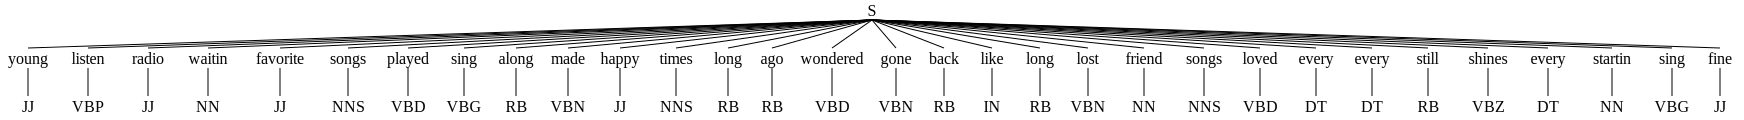

In [17]:
# 命名實體辨識 (Named Entity Recognition, NER)
'''
補充：
如果你想進行 NER，也可以考慮使用更強大的工具，例如 SpaCy、Stanza 或 transformers（Hugging Face）。
'''
ne_chunks = ne_chunk(tagged)
ne_chunks

# Tagging 詞性對照表
- 資料來源: `Williams, S. (2013). An Analysis of POS Tag Patterns in Ontology Identifiers and Labels.`
![](https://miro.medium.com/v2/resize:fit:4800/format:webp/0*mdgyFdVPTchMlTpL.png)

In [18]:
# 詞形還原
lemmatizer = WordNetLemmatizer()

# 預設名詞
print(lemmatizer.lemmatize(word="played"))

# 指定動詞
print(lemmatizer.lemmatize(word="played", pos=wordnet.VERB))

played
play


In [19]:
'''
什麼時候需要用到下面這段程式碼？
- 建議使用（傳統 NLP / 特徵工程場景）
- 你要做詞頻、TF-IDF、BM25、傳統分類/分群等
- 你想降低 vocabulary（把 play/played/playing 合併）
- 你在做 IR（資訊檢索）想提高匹配率
'''

# 將 Penn Treebank 標註轉換為 WordNet 可接受的標註
def penn_to_wordnet(tag: str):
    if tag.startswith("J"): # JJ, JJR, JJS ... (形容詞，副詞比較級，最高級)
        return wordnet.ADJ
    if tag.startswith("V"): # VB, VBD, VBG, VBN, VBP, VBZ ... (動詞過去式，現在分詞，過去分詞)
        return wordnet.VERB
    if tag.startswith("N"): # NN, NNS, NNP, NNPS ... (名詞單數、複數)
        return wordnet.NOUN
    if tag.startswith("R"): # RB, RBR, RBS ... (副詞，副詞比較級，最高級)
        return wordnet.ADV
    return wordnet.NOUN  # fallback

# 詞形還原
tokens_lemm = [lemmatizer.lemmatize(word=w, pos=penn_to_wordnet(t)) for w, t in tagged]

# 顯示前 50 個詞形還原結果
tokens_lemm[:50]

['young',
 'listen',
 'radio',
 'waitin',
 'favorite',
 'song',
 'play',
 'sing',
 'along',
 'make',
 'happy',
 'time',
 'long',
 'ago',
 'wonder',
 'go',
 'back',
 'like',
 'long',
 'lose',
 'friend',
 'song',
 'love',
 'every',
 'every',
 'still',
 'shin',
 'every',
 'startin',
 'sing',
 'fine']